# K Nearest Neighbors with Python

# Import Libraries


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get the Data
Set index_col=0 to use the first column as the index.

In [2]:
df = pd.read_csv('Classified Data.txt', index_col=0)

In [18]:
df.shape

(1000, 11)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [5]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [6]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [8]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


# Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.30)

# Using KNN
Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier(n_neighbors=1)

In [13]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [14]:
pred = knn.predict(X_test)

# Predictions and Evaluations

In [19]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,pred))

[[136  20]
 [  7 137]]


In [20]:
print(accuracy_score(y_test,pred))

0.91


In [17]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       156
           1       0.87      0.95      0.91       144

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



# Choosing a K Value


In [24]:
score = []
for i in range(1,30,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    score.append(accuracy_score(y_pred,y_test))
    print(f"accuracy with {i}:{accuracy_score(y_pred,y_test)}")

accuracy with 1:0.91
accuracy with 3:0.94
accuracy with 5:0.9466666666666667
accuracy with 7:0.9433333333333334
accuracy with 9:0.95
accuracy with 11:0.95
accuracy with 13:0.95
accuracy with 15:0.9433333333333334
accuracy with 17:0.94
accuracy with 19:0.9433333333333334
accuracy with 21:0.94
accuracy with 23:0.94
accuracy with 25:0.94
accuracy with 27:0.94
accuracy with 29:0.9366666666666666


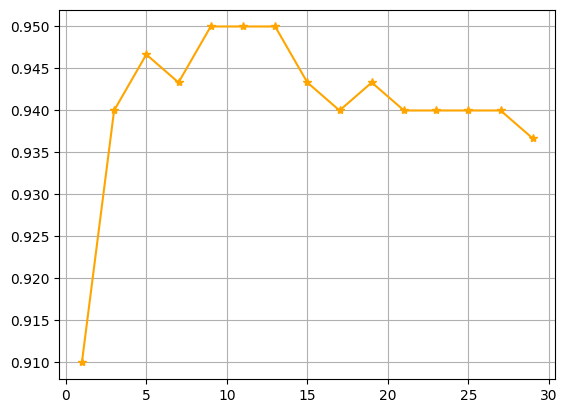

In [29]:
plt.plot(range(1,30,2),score,marker='*',color='orange')
plt.grid()
plt.show()